In [4]:
from unsuper import *
import seaborn as sns

# T-SNE
from sklearn.manifold import TSNE

sns.set_style('ticks')
sns.set(font_scale=1.5)

In [8]:
data = load_data(monte=False)
#X=data
#print(X.shape)
inputs_col = pd.DataFrame()

data['u-g']=data['u']-data['g']
data['g-r']=data['g']-data['r']
data['r-i']=data['r']-data['i']
data['i-z']=data['i']-data['z']
data['z-y']=data['z']-data['y']
data['u-G']=data['u']-data['G']
data['u-RP']=data['u']-data['RP']
data['u-BP']=data['u']-data['BP']

#X = data[['u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'u-G', 'u-RP', 'u-BP']].copy()
#X = normalize(X_input)
X2 = data[['u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'u-G', 'u-RP', 'u-BP',  'Teff', 'logg', 'feh']].copy()
X = data[['u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'u-G', 'u-RP', 'u-BP']].copy()

X2_norm = normalize(X2)
X_norm = normalize(X)

projection = TSNE().fit_transform(X_norm)

In [9]:
pickle.dump(projection, open('tsne.pickle', 'wb'))

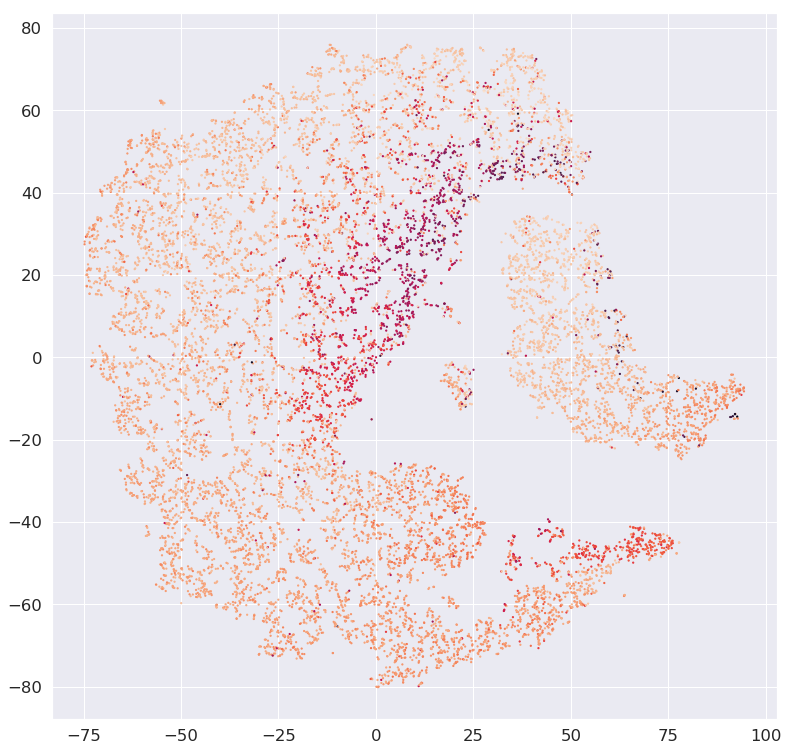

In [11]:
fig, ax = plt.subplots(figsize=(13, 13))
plt.scatter(*projection.T, s=1.5, c=X2_norm['logg'])